# Project TITACON Camp
### Import libraries and Data format reveiw

In [ ]:
# Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
# import warnings

# Enable inline plotting
%matplotlib inline

# Set seaborn style for plots
sns.set_style(style="darkgrid")

# Load the dataset
df = pd.read_csv("fitness_dataset.csv") # write here the path of the csv file
df.head()

,age,height_cm,weight_kg,heart_rate,blood_pressure,sleep_hours,nutrition_quality,activity_index,smokes,gender,is_fit
0,56,152,65,69.6,117.0,NaN,2.37,3.97,no,F,1
1,69,186,95,60.8,114.8,7.5,8.77,3.19,0,F,1
2,46,192,103,61.4,116.4,NaN,8.20,2.03,0,F,0
3,32,189,83,60.2,130.1,7.0,6.18,3.68,0,M,1
4,60,175,99,58.1,115.8,8.0,9.95,4.83,yes,F,1


In [ ]:
df.shape

(2000, 11)

# Overview and Preprocessing 

In [ ]:
df.columns.tolist() # turns the column names to a list

['age',
 'height_cm',
 'weight_kg',
 'heart_rate',
 'blood_pressure',
 'sleep_hours',
 'nutrition_quality',
 'activity_index',
 'smokes',
 'gender',
 'is_fit']

In [ ]:
# Check for duplicate rows
num_duplicates = df.duplicated().sum()
print(f"Number of duplicate rows: {num_duplicates}")

# Drop duplicates if any
if num_duplicates > 0:
    df = df.drop_duplicates().reset_index(drop=True)
    print("Duplicates dropped. New shape:", df.shape)
else:
    print("No duplicate rows found.")

Number of duplicate rows: 0
No duplicate rows found.


In [ ]:
df.info() 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 11 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   age                2000 non-null   int64  
 1   height_cm          2000 non-null   int64  
 2   weight_kg          2000 non-null   int64  
 3   heart_rate         2000 non-null   float64
 4   blood_pressure     2000 non-null   float64
 5   sleep_hours        1840 non-null   float64
 6   nutrition_quality  2000 non-null   float64
 7   activity_index     2000 non-null   float64
 8   smokes             2000 non-null   object 
 9   gender             2000 non-null   object 
 10  is_fit             2000 non-null   int64  
dtypes: float64(5), int64(4), object(2)
memory usage: 172.0+ KB


In [ ]:


df['smokes']= df['smokes'].replace({'yes': 1, 'no' : 0})
df['smokes']= df['smokes'].astype(int)

df['gender']= df['gender'].replace({'M': 1 , 'F': 0})
df['gender']= df['gender'].astype(int)

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 11 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   age                2000 non-null   int64  
 1   height_cm          2000 non-null   int64  
 2   weight_kg          2000 non-null   int64  
 3   heart_rate         2000 non-null   float64
 4   blood_pressure     2000 non-null   float64
 5   sleep_hours        1840 non-null   float64
 6   nutrition_quality  2000 non-null   float64
 7   activity_index     2000 non-null   float64
 8   smokes             2000 non-null   int64  
 9   gender             2000 non-null   int64  
 10  is_fit             2000 non-null   int64  
dtypes: float64(5), int64(6)
memory usage: 172.0 KB


C:\Users\ahmed\AppData\Local\Temp\ipykernel_33448\3411288892.py:4: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df['gender']= df['gender'].replace({'M': 1 , 'F': 0})


In [ ]:
df.isnull().sum()

age                    0
height_cm              0
weight_kg              0
heart_rate             0
blood_pressure         0
sleep_hours          160
nutrition_quality      0
activity_index         0
smokes                 0
gender                 0
is_fit                 0
dtype: int64

In [ ]:
df = df.dropna() # drop all rows with any missing values
df.shape

(1840, 11)

In [ ]:
df.head()

,age,height_cm,weight_kg,heart_rate,blood_pressure,sleep_hours,nutrition_quality,activity_index,smokes,gender,is_fit
1,69,186,95,60.8,114.8,7.5,8.77,3.19,0,0,1
3,32,189,83,60.2,130.1,7.0,6.18,3.68,0,1,1
4,60,175,99,58.1,115.8,8.0,9.95,4.83,1,0,1
5,25,172,85,81.2,119.2,7.7,7.35,4.08,1,1,0
6,78,193,83,79.6,132.5,7.4,2.16,3.42,1,0,0


In [ ]:
df.sort_values('age', ascending=False)[['age' ,'is_fit', 'weight_kg', 'height_cm']].head()


,age,is_fit,weight_kg,height_cm
1346,79,0,103,179
45,79,0,73,169
1646,79,1,63,177
46,79,0,118,154
1240,79,1,54,181


In [ ]:
df.sort_values('height_cm', ascending=True)[['height_cm' , 'weight_kg', 'age']].head()

,height_cm,weight_kg,age
1966,150,60,39
702,150,113,57
1700,150,78,76
1050,150,69,48
662,150,95,22


In [ ]:
df.sort_values('weight_kg', ascending=False)[[ 'weight_kg', 'age' ,'height_cm']].head()

,weight_kg,age,height_cm
268,250,79,160
670,250,75,175
1960,250,33,155
933,250,20,151
1257,220,51,190


# EDA

In [ ]:
df.describe()

,age,height_cm,weight_kg,heart_rate,blood_pressure,sleep_hours,nutrition_quality,activity_index,smokes,gender,is_fit
count,1840.000000,1840.00000,1840.000000,1840.000000,1840.000000,1840.000000,1840.000000,1840.000000,1840.000000,1840.000000,1840.000000
mean,49.135870,174.50163,83.789130,70.196576,119.886304,7.513315,5.023924,2.998114,0.446196,0.481522,0.398370
std,17.950116,14.40100,25.776407,11.783745,14.499130,1.502031,2.865756,1.132126,0.497232,0.499794,0.489695
min,18.000000,150.00000,30.000000,45.000000,90.000000,4.000000,0.000000,1.000000,0.000000,0.000000,0.000000
25%,34.000000,162.00000,64.000000,62.100000,109.800000,6.500000,2.547500,2.047500,0.000000,0.000000,0.000000
50%,49.000000,174.00000,83.000000,70.100000,119.800000,7.500000,5.050000,2.990000,0.000000,0.000000,0.000000
75%,65.000000,187.00000,102.000000,78.300000,129.800000,8.600000,7.462500,3.930000,1.000000,1.000000,1.000000
max,79.000000,199.00000,250.000000,118.600000,171.200000,12.000000,10.000000,4.990000,1.000000,1.000000,1.000000


Text(0, 0.5, 'Num of clients')

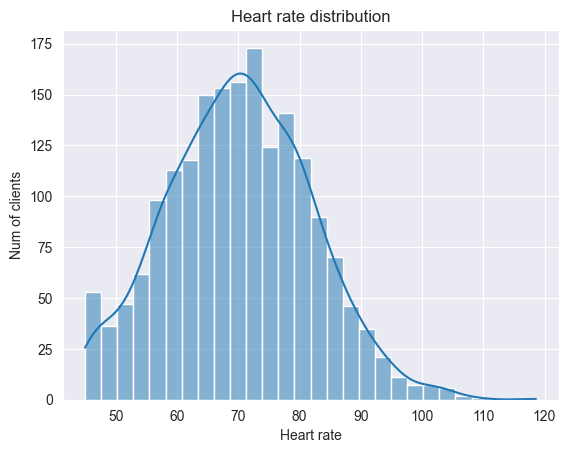

In [ ]:
sns.histplot(df['heart_rate'] , kde=True)
plt.title('Heart rate distribution')
plt.xlabel('Heart rate')
plt.ylabel('Num of clients')

In [ ]:
df=df[(df['heart_rate']>0) & (df['heart_rate']<105)]
df.shape

(1836, 11)

Text(0, 0.5, 'Num of clients')

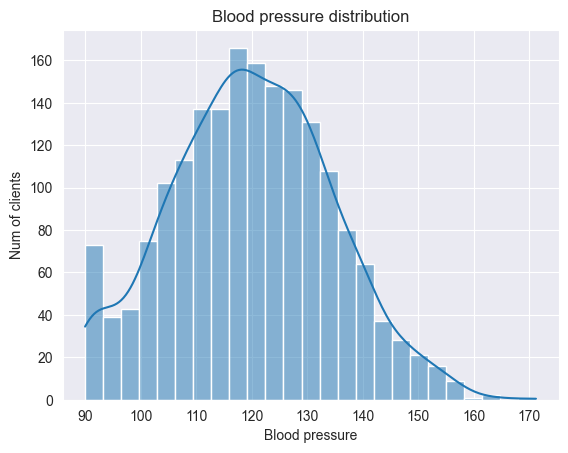

In [ ]:
sns.histplot(df['blood_pressure'] , kde=True)
plt.title('Blood pressure distribution')
plt.xlabel('Blood pressure')
plt.ylabel('Num of clients')

In [ ]:
df=df[(df['blood_pressure']>0) & (df['blood_pressure']<160)]
df.shape

(1833, 11)

Text(0, 0.5, 'Num of clients')

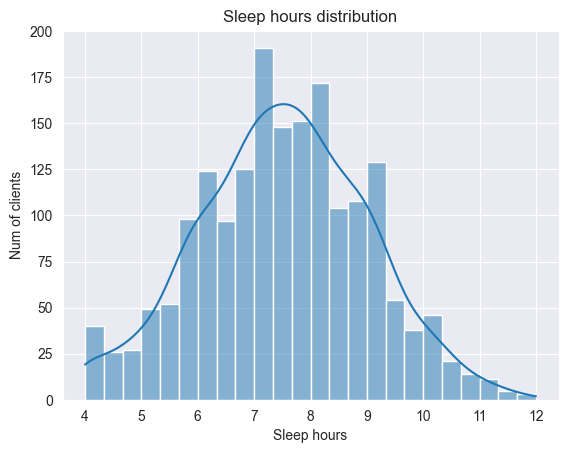

In [ ]:
sns.histplot(df['sleep_hours'] , kde=True)
plt.title('Sleep hours distribution')
plt.xlabel('Sleep hours')
plt.ylabel('Num of clients')

Text(0, 0.5, 'Num of clients')

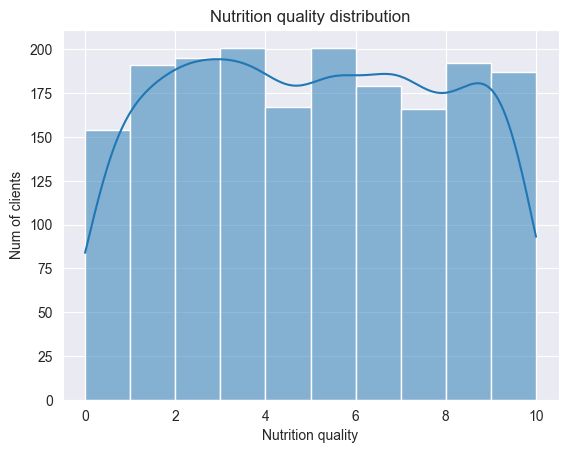

In [ ]:
sns.histplot(df['nutrition_quality'] , bins=10 , kde=True)
plt.title('Nutrition quality distribution')
plt.xlabel('Nutrition quality')
plt.ylabel('Num of clients')

Text(0, 0.5, 'Num of clients')

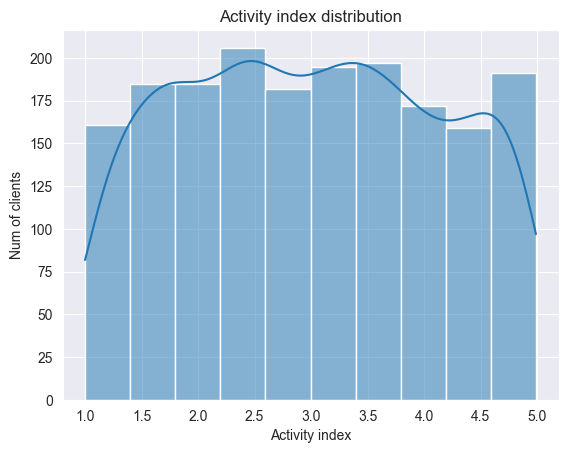

In [ ]:
sns.histplot(df['activity_index'] , bins=10 , kde=True)
plt.title('Activity index distribution')
plt.xlabel('Activity index')
plt.ylabel('Num of clients')

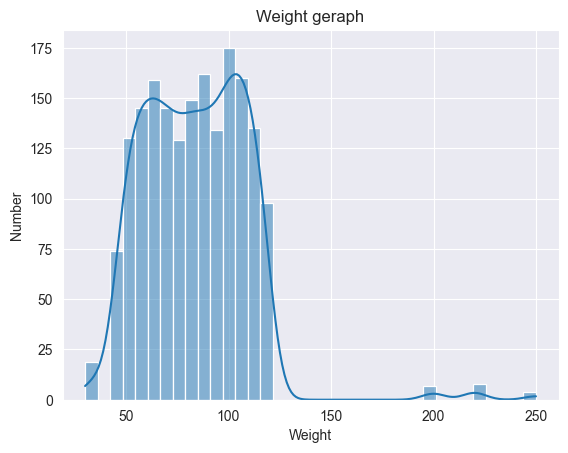

In [ ]:
sns.histplot(df['weight_kg'] , kde=True)
plt.title('Weight geraph')
plt.xlabel('Weight')
plt.ylabel('Number')
plt.show()

In [ ]:
df=df[(df['weight_kg']>45) & (df['weight_kg']<=150)]
df.shape

(1777, 11)

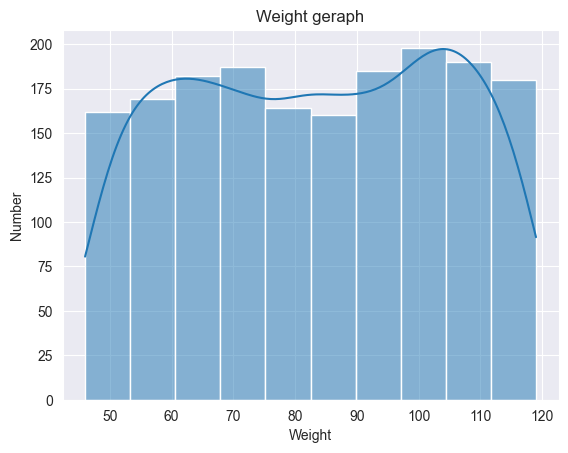

In [ ]:
sns.histplot(df['weight_kg'] ,bins=10 , kde=True)
plt.title('Weight geraph')
plt.xlabel('Weight')
plt.ylabel('Number')
plt.show()

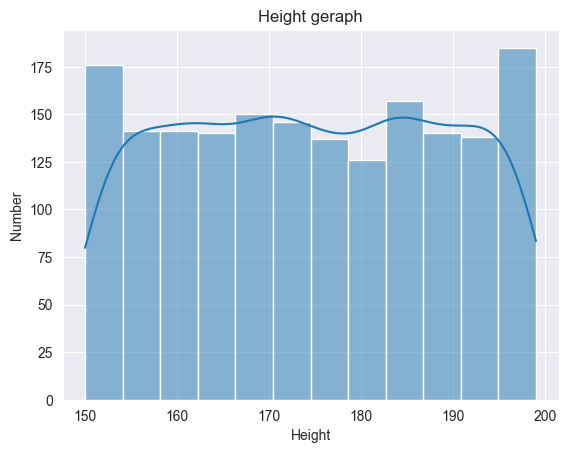

In [ ]:
sns.histplot(df['height_cm'] , kde=True)
plt.title('Height geraph')
plt.xlabel('Height')
plt.ylabel('Number')
plt.show()

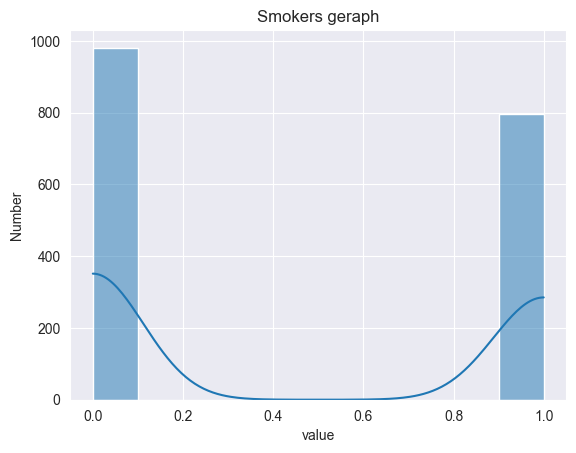

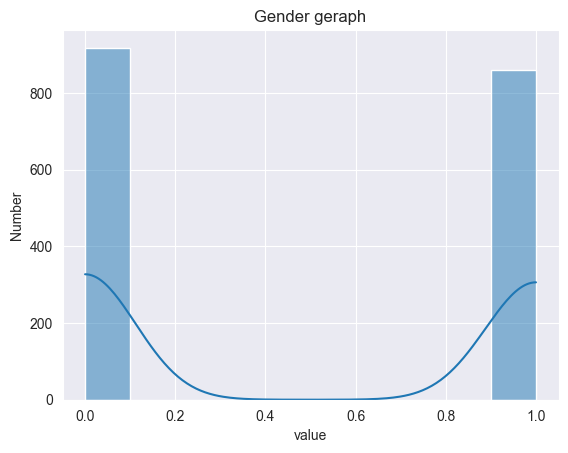

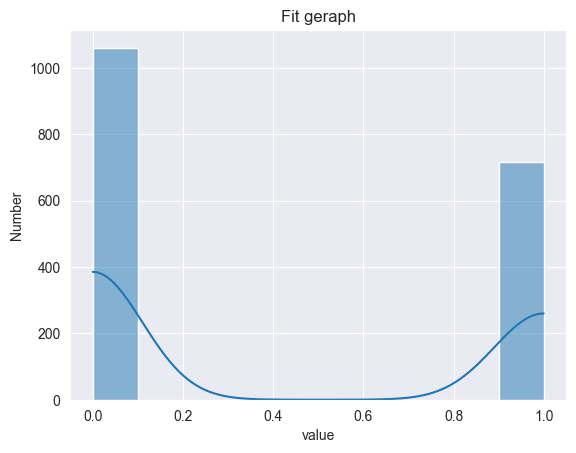

In [ ]:
sns.histplot(df['smokes' ] ,bins=10 , kde=True)
plt.title('Smokers geraph')
plt.xlabel('value')
plt.ylabel('Number')
plt.show()
##----------------------------------
sns.histplot(df['gender' ] ,bins=10 , kde=True)
plt.title('Gender geraph')
plt.xlabel('value')
plt.ylabel('Number')
plt.show()
#-----------------------------------
sns.histplot(df['is_fit' ] ,bins=10 , kde=True)
plt.title('Fit geraph')
plt.xlabel('value')
plt.ylabel('Number')
plt.show()

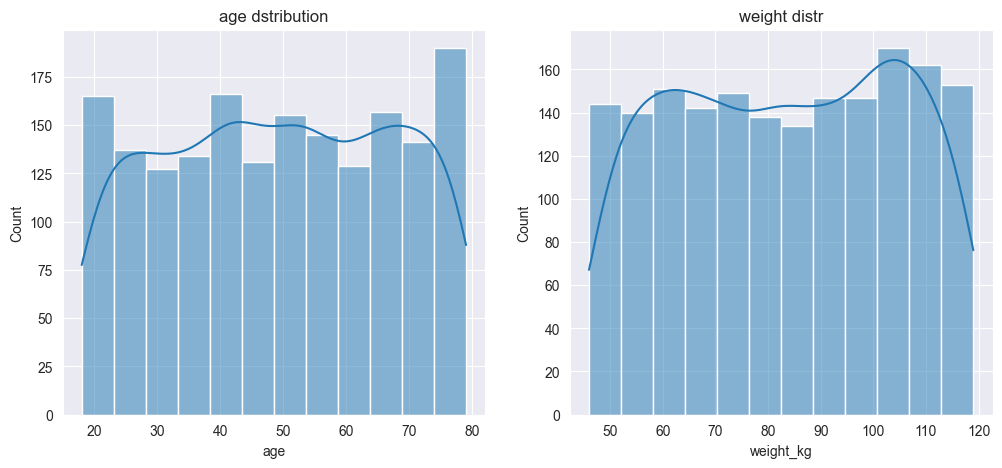

In [ ]:

plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
sns.histplot(df['age'], kde=True)
plt.title('age dstribution')

plt.subplot(1, 2, 2)
sns.histplot(df['weight_kg'], kde=True)
plt.title('weight distr')
plt.show()

# Relationships between elements

### Age with Is fit ?

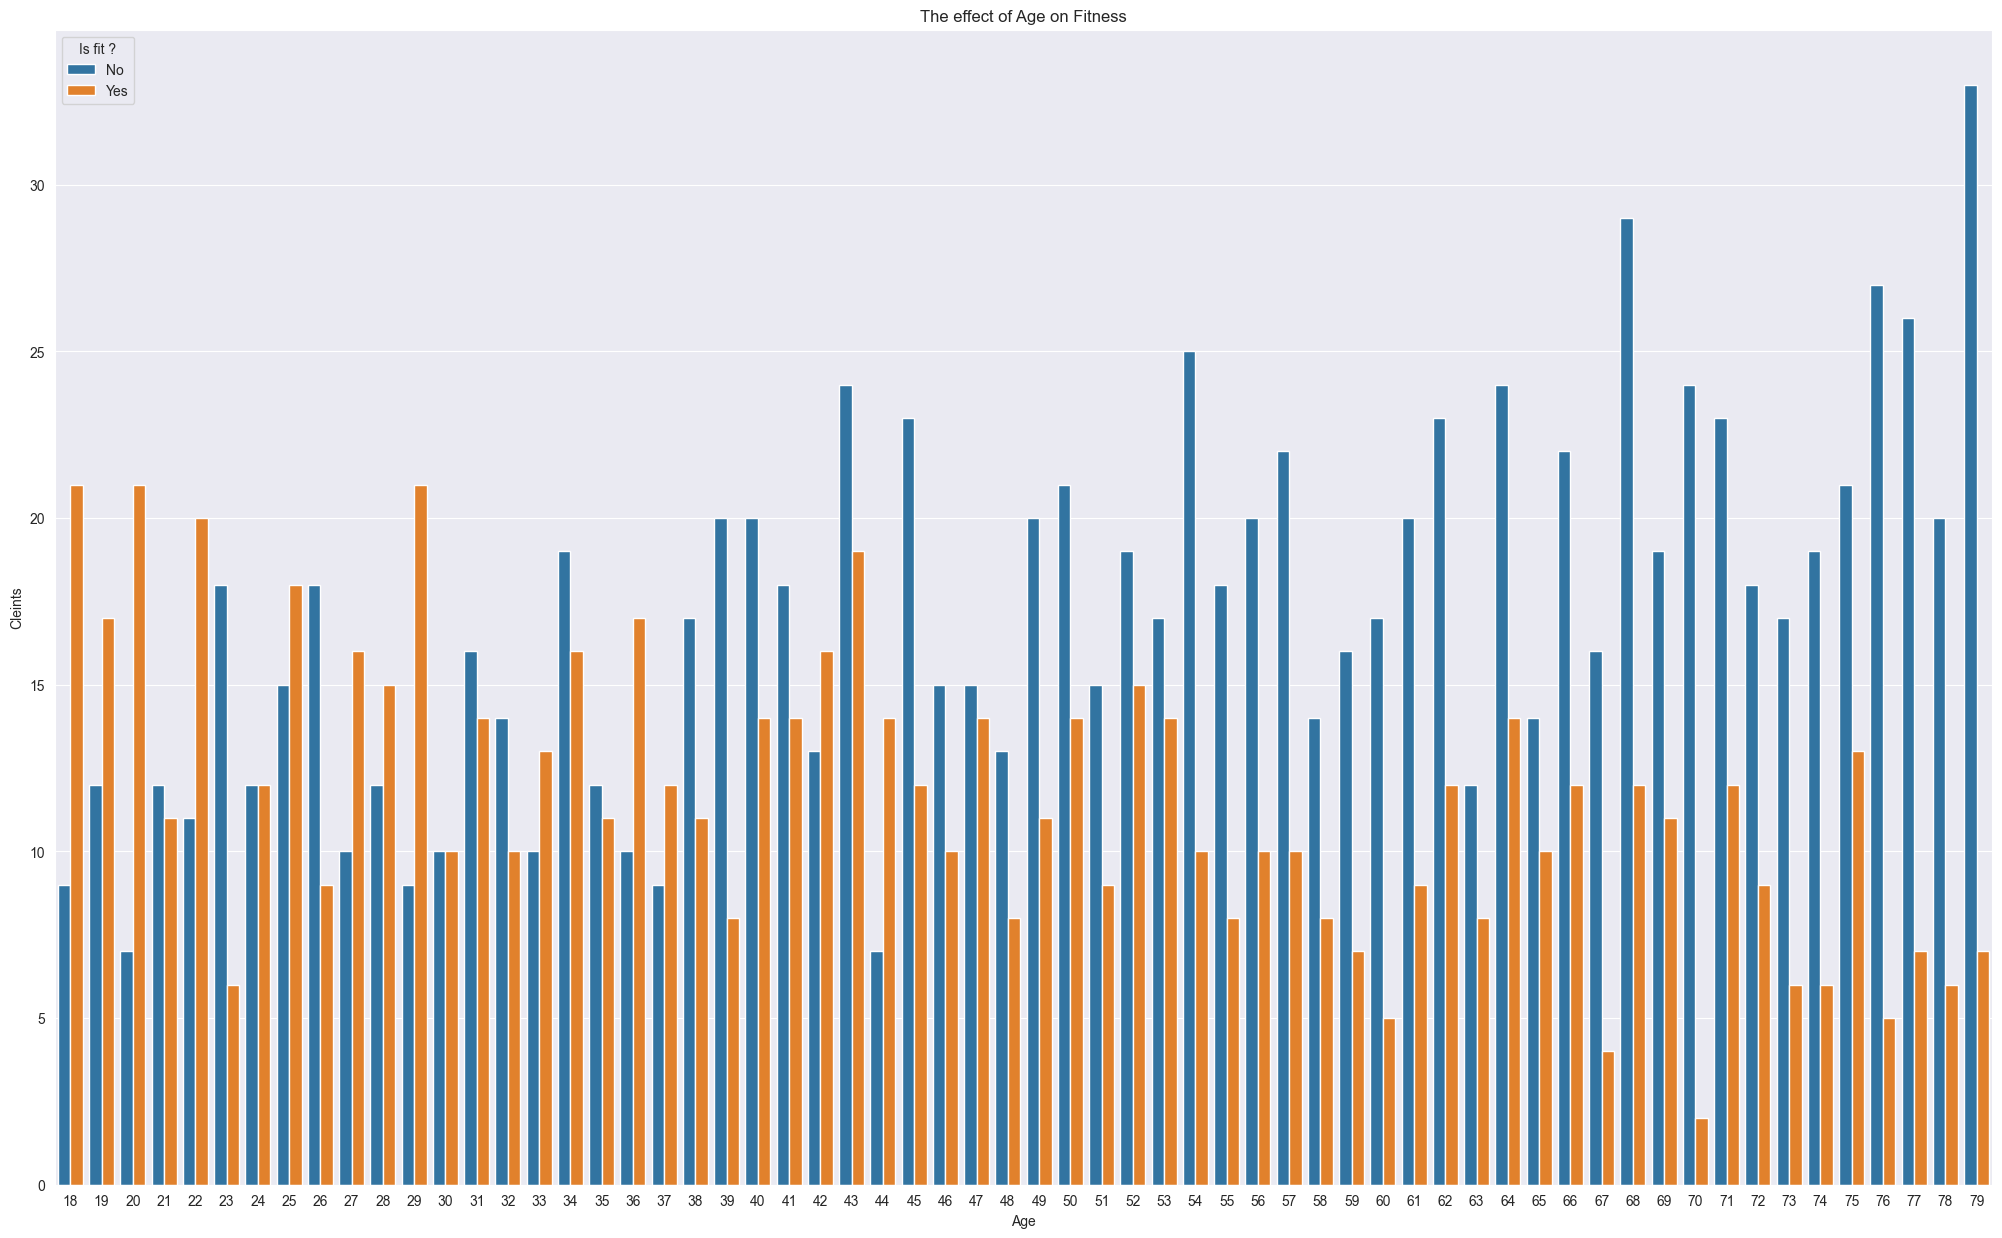

In [ ]:
plt.figure(figsize=(25, 15))
sns.countplot(data=df, x='age', hue='is_fit')
plt.title('The effect of Age on Fitness')
plt.xlabel('Age')
plt.ylabel('Cleints')
plt.legend(title = 'Is fit ?' , labels=['No' , 'Yes'])
plt.show()

### Weight with Is fit ?

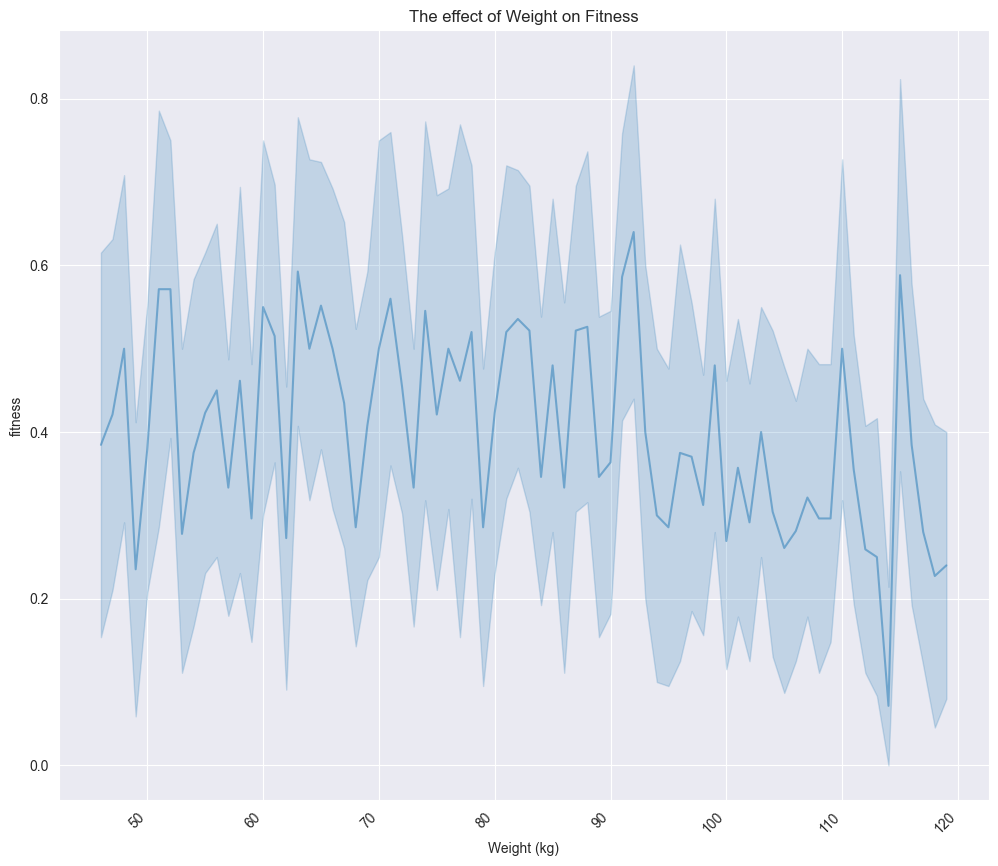

In [ ]:
plt.figure(figsize=(12, 10))

sns.lineplot(data=df, x='weight_kg', y='is_fit', alpha=0.5)

plt.title('The effect of Weight on Fitness')
plt.xlabel('Weight (kg)')
plt.xticks(rotation=45, ha='right')
plt.ylabel('fitness')

plt.show()


### Height with Is fit ?

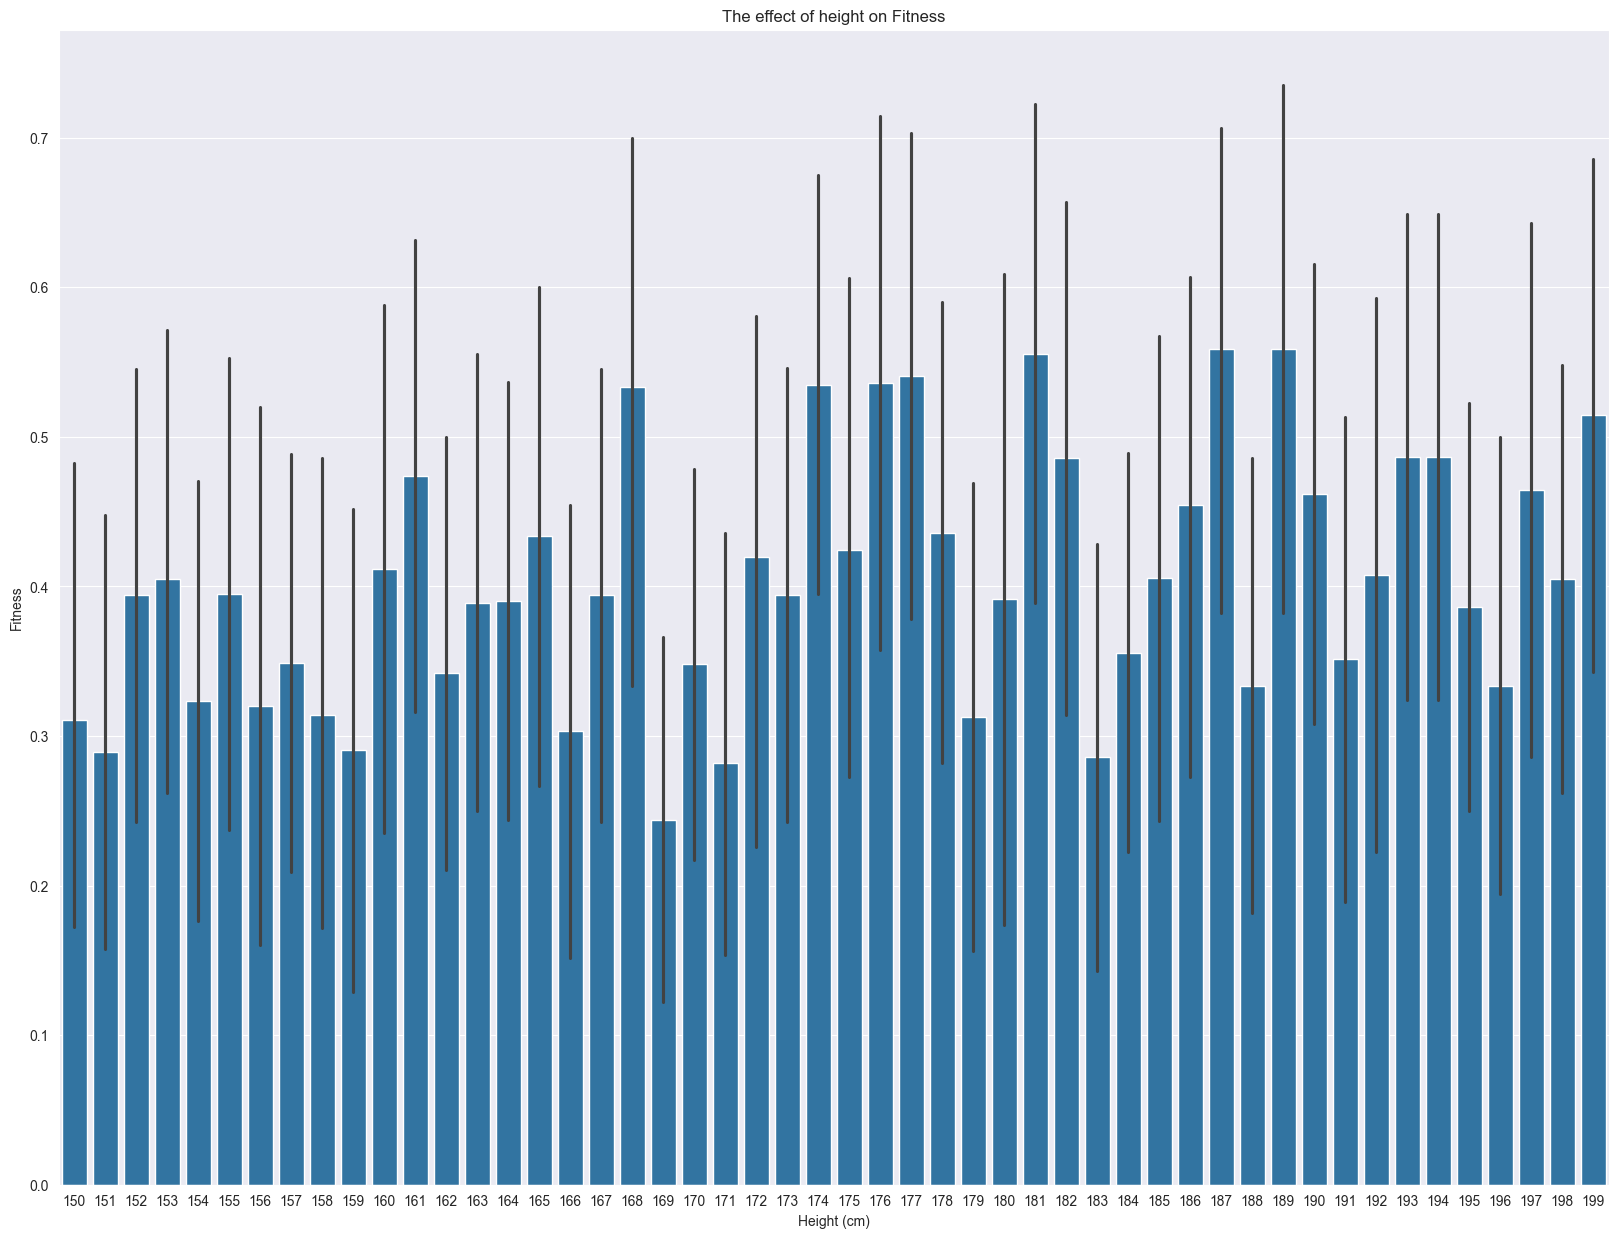

In [ ]:
plt.figure(figsize=(20,15))

sns.barplot (data=df, x='height_cm', y='is_fit')

plt.title('The effect of height on Fitness')
plt.xlabel('Height (cm)')
plt.ylabel('Fitness')

plt.show()


### Age with Heart Rate ?

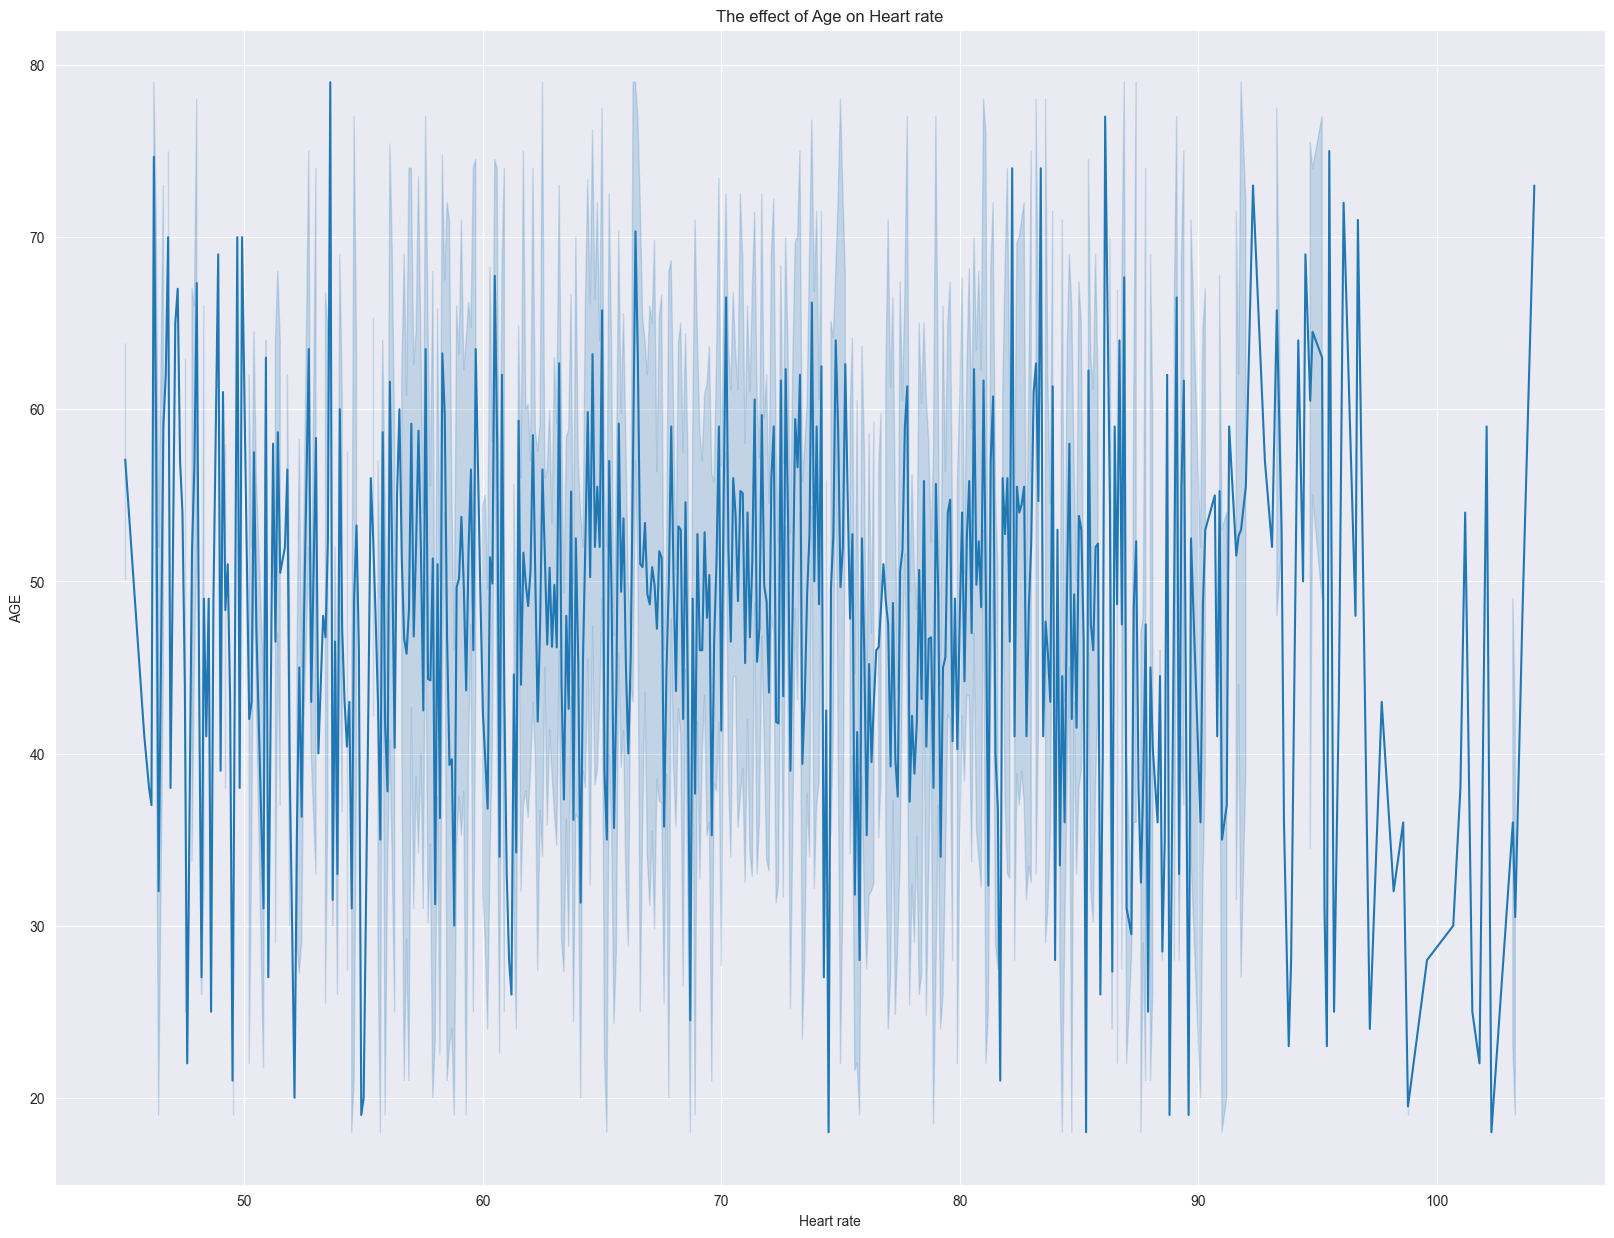

In [ ]:
plt.figure(figsize=(20,15))

sns.lineplot (data=df, x='heart_rate', y='age')

plt.title('The effect of Age on Heart rate')
plt.ylabel('AGE')
plt.xlabel('Heart rate')

plt.show()


### Nutrition quality with Fitness ?

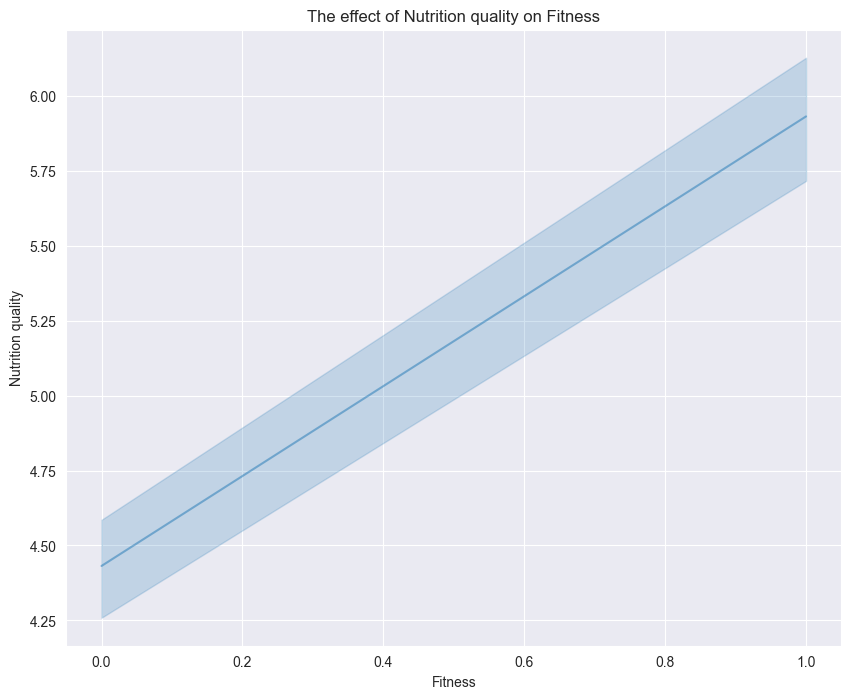

In [ ]:
plt.figure(figsize=(10,8))

sns.lineplot (data=df, x='is_fit', y='nutrition_quality' , alpha=0.5)

plt.title('The effect of Nutrition quality on Fitness')
plt.xlabel('Fitness')
plt.ylabel('Nutrition quality')
plt.show()

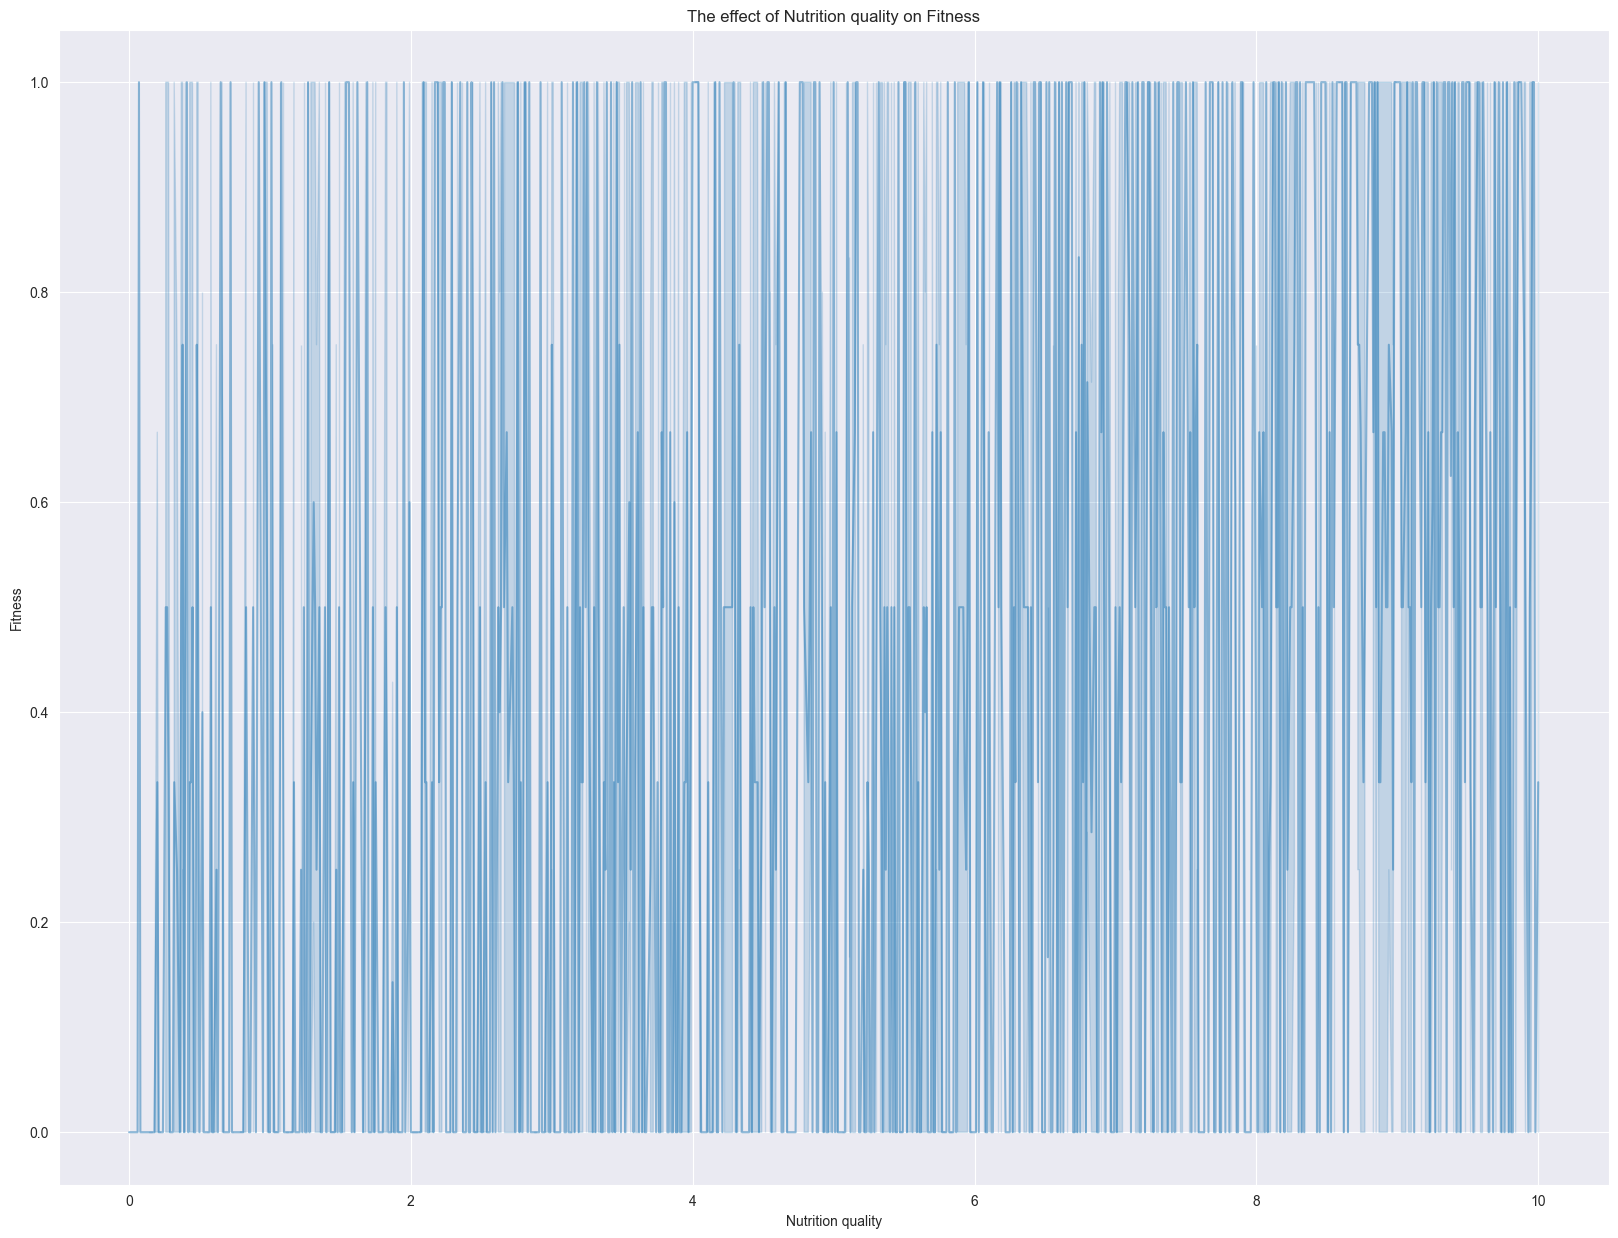

In [ ]:
plt.figure(figsize=(20,15))

sns.lineplot (data=df, y='is_fit', x='nutrition_quality' , alpha=0.5)

plt.title('The effect of Nutrition quality on Fitness')
plt.ylabel('Fitness')
plt.xlabel('Nutrition quality')
plt.show()

### Smokes with Activity index ?

<function matplotlib.pyplot.show(close=None, block=None)>

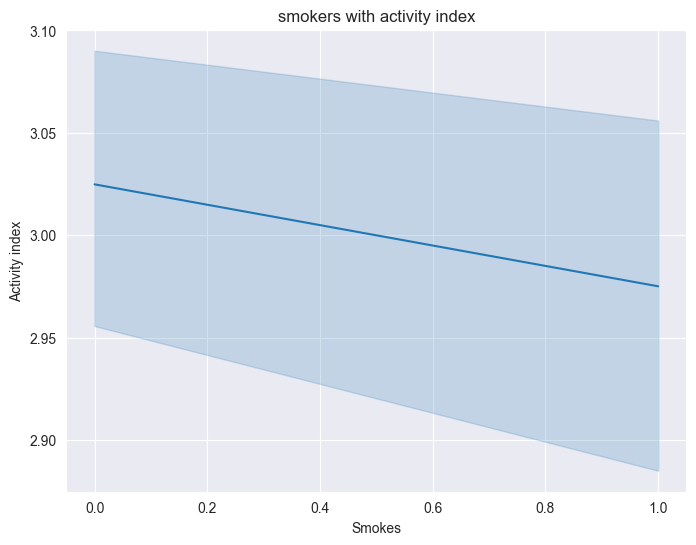

In [ ]:
plt.figure(figsize=(8, 6))
sns.lineplot(x='smokes', y='activity_index' ,data=df)
plt.title('smokers with activity index')
plt.xlabel('Smokes')
plt.ylabel('Activity index')
plt.show

<function matplotlib.pyplot.show(close=None, block=None)>

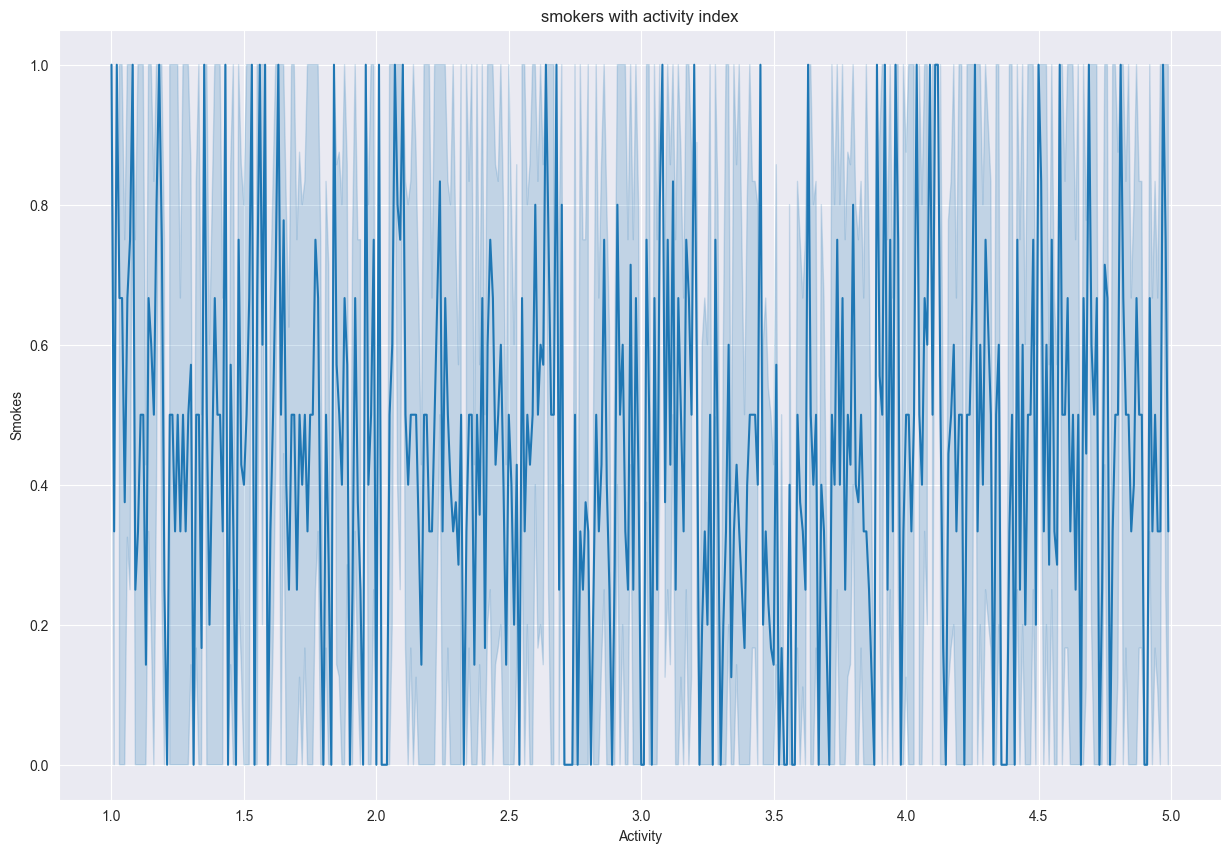

In [ ]:
plt.figure(figsize=(15, 10))
sns.lineplot(x='activity_index', y='smokes' ,data=df)
plt.title('smokers with activity index')
plt.xlabel('Activity')
plt.ylabel('Smokes')
plt.show

### Blood pressure with Fitness ?


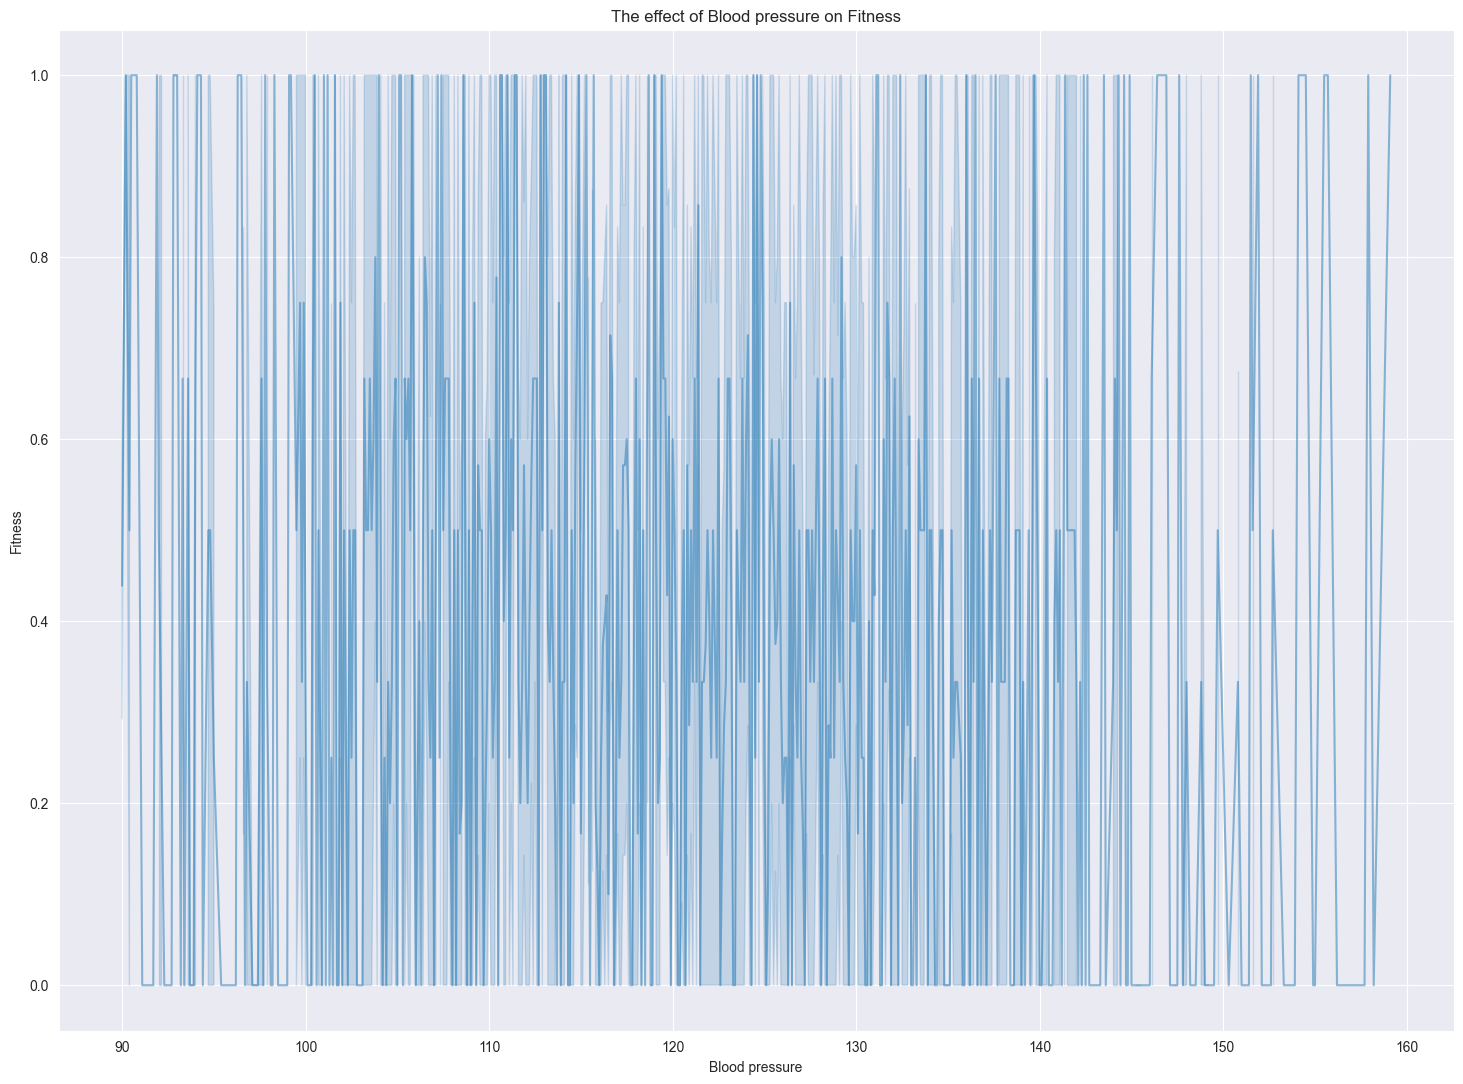

In [ ]:
plt.figure(figsize=(18,13))

sns.lineplot (data=df, x='blood_pressure', y='is_fit' , alpha=0.5)

plt.title('The effect of Blood pressure on Fitness')
plt.ylabel('Fitness')
plt.xlabel('Blood pressure')
plt.show()

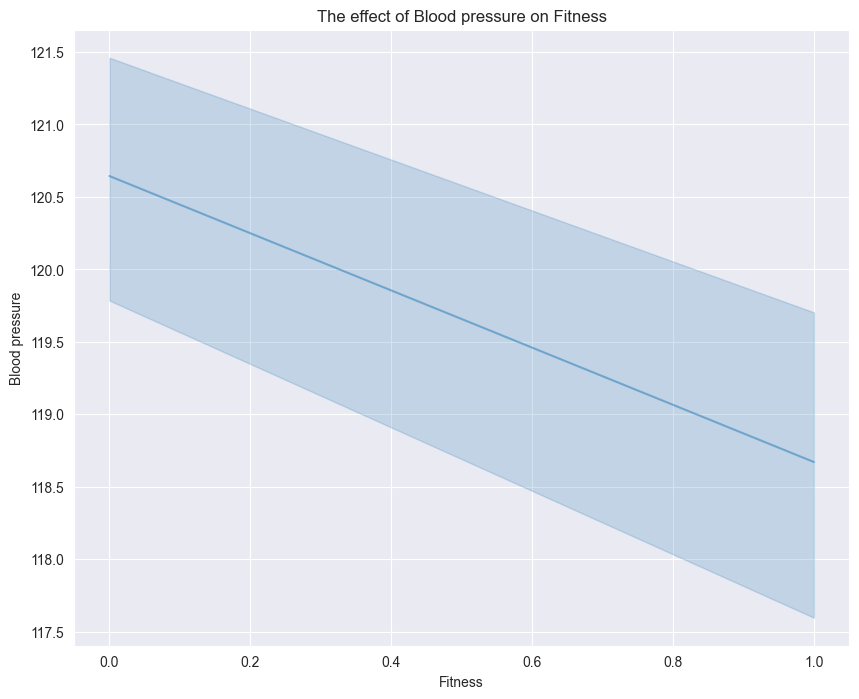

In [ ]:
plt.figure(figsize=(10,8))

sns.lineplot (data=df, x='is_fit', y='blood_pressure' , alpha=0.5)

plt.title('The effect of Blood pressure on Fitness')
plt.xlabel('Fitness')
plt.ylabel('Blood pressure')
plt.show()

## Correlation Analysis

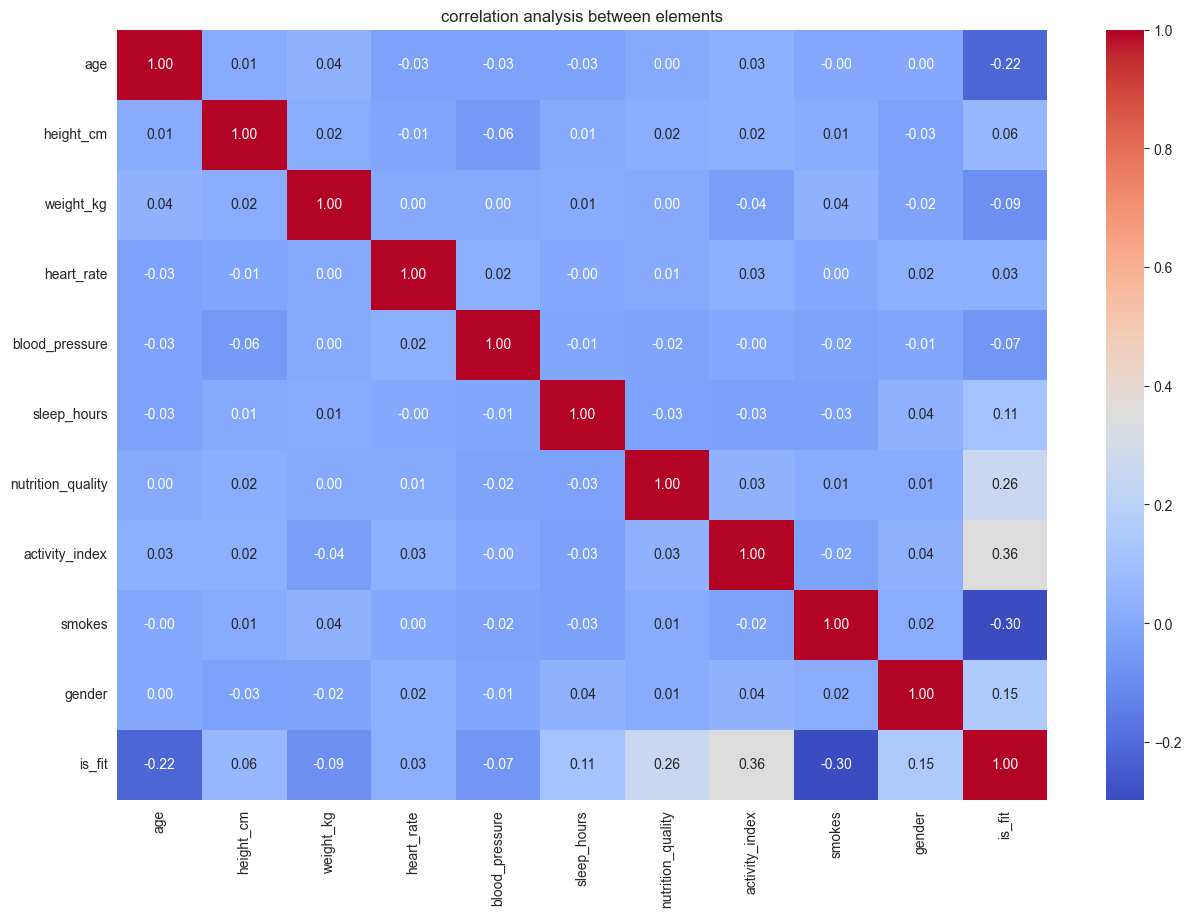

In [ ]:

correlation_analysis = df.corr(numeric_only=True)
plt.figure(figsize=(15, 10))
sns.heatmap(correlation_analysis, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('correlation analysis between elements')
plt.show()

# - Modeling & Evaluation -

## Create a model that predicts whether a person (will be fit or no ?)

In [ ]:
# Import necessary libraries

from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score , classification_report

x = df[['activity_index' ,'smokes', 'nutrition_quality' , 'age' , 'gender', 'sleep_hours' ]]
y = df['is_fit']

x_train , x_test ,y_train , y_test =train_test_split(x ,y ,test_size = 0.2 , random_state=42)

In [ ]:
model1 = DecisionTreeClassifier()    

model1.fit(x_train , y_train)

,criterion,'gini'
,splitter,'best'
,max_depth,None
,min_samples_split,2
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0
,max_features,None
,random_state,None
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,class_weight,None


In [ ]:
model2 = RandomForestClassifier(n_estimators=100 , random_state=50)

model2.fit(x_train , y_train)

,n_estimators,100
,criterion,'gini'
,max_depth,None
,min_samples_split,2
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0
,max_features,'sqrt'
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,bootstrap,True
,oob_score,False


## Evaluation model and calc accuracy 

In [ ]:
y_pred = model1.predict(x_test)  

accuracy = accuracy_score(y_test , y_pred)  # Calc accuracy
print(f'Model accuracy : {accuracy * 100:.2f}%')

print('\nClassification Report:')   # Show a Classification Report 
print(classification_report(y_test, y_pred))

print("\n----------------------------------------------------\n")

y_pred = model2.predict(x_test)  

accuracy = accuracy_score(y_test , y_pred)  # Calc accuracy
print(f'Model accuracy : {accuracy * 100:.2f}%')

print('\nClassification Report:')   # Show a Classification Report 
print(classification_report(y_test, y_pred))

Model accuracy : 71.07%

Classification Report:
              precision    recall  f1-score   support

           0       0.75      0.76      0.75       205
           1       0.66      0.65      0.66       151

    accuracy                           0.71       356
   macro avg       0.70      0.70      0.70       356
weighted avg       0.71      0.71      0.71       356


----------------------------------------------------

Model accuracy : 75.56%

Classification Report:
              precision    recall  f1-score   support

           0       0.77      0.83      0.80       205
           1       0.74      0.66      0.69       151

    accuracy                           0.76       356
   macro avg       0.75      0.74      0.75       356
weighted avg       0.75      0.76      0.75       356

